In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors 
import csv
from matplotlib.patches import Rectangle
import seaborn as sns


In [2]:
# LOAD DATASETS ON PANDAS DATAFRAMES
netflix = pd.read_csv("netflix_new.csv")
directors = pd.read_csv("directors.csv")
actors = pd.read_csv("actors.csv")

netflix["date_added"] = pd.to_datetime(netflix["date_added"])
netflix['year_added'] = netflix['date_added'].dt.year  

In [3]:
# PREPARE FOR CREATING COUNTRIES DATAFRAME
countries = pd.DataFrame(columns=["name", "rated_movies", "averageRating"])
netflix_new2=netflix[netflix["averageRating"].notna()].dropna(subset="country").reset_index(drop=True)
co=netflix_new2["country"].values.tolist()

# CREATE COUNTRIES DATAFRAME
for i in range(len(co)):
    for country in co[i].split(","):
        if country.strip() in countries["name"].values.tolist():
            old_row = countries[countries["name"]==country.strip()].values.tolist()[0]
            new_row = [old_row[0],old_row[1]+1,(old_row[2]*old_row[1]+netflix_new2.loc[i,"averageRating"])/(old_row[1]+1)]
            countries[countries["name"]==country.strip()] = new_row
            
        else:
            countries.loc[len(countries.index)] = [country.strip(),1,netflix_new2["averageRating"][i]]

# SORT DATAFRAME BY RATING
countries = countries.sort_values("averageRating", ascending=False).reset_index(drop=True)

In [4]:
# PREPARE FOR CREATING GENRE DATAFRAME
gen = pd.DataFrame(columns=["genre", "rated_movies", "averageRating"])
netflix_new4=netflix[netflix["averageRating"].notna()].dropna(subset="listed_in").reset_index(drop=True)
ge=netflix_new4["listed_in"].values.tolist()

# CREATE GENRE DATAFRAME
for i in range(len(ge)):
    for genre in ge[i].split(","):
        if genre.strip() in gen["genre"].values.tolist():
            old_row = gen[gen["genre"]==genre.strip()].values.tolist()[0]
            new_row = [old_row[0],old_row[1]+1,(old_row[2]*old_row[1]+netflix_new4.loc[i,"averageRating"])/(old_row[1]+1)]
            gen[gen["genre"]==genre.strip()] = new_row
            
        else:
            gen.loc[len(gen.index)] = [genre.strip(),1,netflix_new4["averageRating"][i]]

# SORT DATAFRAME BY RATING
gen = gen.sort_values("averageRating", ascending=False).reset_index(drop=True)

In [5]:
for genre in gen["genre"]:
    if (genre.find("TV")!=-1 or genre.find("series")!=-1 or genre.find("Series")!=-1 or genre=="Movies"):
        gen.drop(gen.index[gen["genre"]==genre].values, inplace=True)
gen = gen.sort_values("averageRating").reset_index(drop=True)

In [6]:
# Top Actors
top_actors_list=actors[actors["rated_movies"]>5][:100]["name"].values.tolist()
top_directors_list=directors[directors["rated_movies"]>0][:100]["name"].values.tolist()
netflix_new2=netflix.dropna(subset=["cast","director"]).reset_index(drop=True)
netflix_new3=netflix.dropna(subset="director").reset_index(drop=True)


In [7]:
netflix_new2["top_actors"]= False
netflix_new3["top_directors"]= False

# ADD TOP ACTORS COUNT COLUMN
for i in range(netflix_new2.shape[0]):
    for actor in netflix_new2.loc[i]["cast"].split(","):
        if actor.strip() in top_actors_list:
            netflix_new2["top_actors"][i]=True #netflix_new2["top_actors"][i] + 1

# ADD TOP DIRECTORS COUNT COLUMN
for i in range(netflix_new3.shape[0]):
    for director in netflix_new3.loc[i]["director"].split(","):
        if director.strip() in top_directors_list:
            netflix_new3["top_directors"][i]=True #netflix_new3["top_directors"][i] + 1

tactorsgenre=netflix_new2[(netflix_new2["top_actors"].values.tolist())].groupby("listed_in").count()["top_actors"]
tdirgenre=netflix_new3[(netflix_new3["top_directors"].values.tolist())].groupby("listed_in").count()["top_directors"]

/var/folders/g9/q6tzypkx56110bt4s_wsr1y40000gn/T/ipykernel_20431/1661637654.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_new2["top_actors"][i]=True #netflix_new2["top_actors"][i] + 1
/var/folders/g9/q6tzypkx56110bt4s_wsr1y40000gn/T/ipykernel_20431/1661637654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_new3["top_directors"][i]=True #netflix_new3["top_directors"][i] + 1


In [8]:
top_by_genre = pd.DataFrame(columns=["genre", "top_directors", "top_actors"])

# CREATE TOP BY GENRE DATAFRAME
for i in range(len(tactorsgenre.index.tolist())):
    for genre in tactorsgenre.index[i].split(","):
        if genre.strip() in top_by_genre["genre"].values.tolist():
            old_row = top_by_genre[top_by_genre["genre"]==genre.strip()].values.tolist()[0]
            new_row = [old_row[0],old_row[1],old_row[2]+tactorsgenre[i]]
            top_by_genre[top_by_genre["genre"]==genre.strip()] = new_row
        else:
            top_by_genre.loc[len(top_by_genre.index)] = [genre.strip(),0,tactorsgenre[i]]

for i in range(len(tdirgenre.index.tolist())):
    for genre in tdirgenre.index[i].split(","):
        if genre.strip() in top_by_genre["genre"].values.tolist():
            old_row = top_by_genre[top_by_genre["genre"]==genre.strip()].values.tolist()[0]
            new_row = [old_row[0],old_row[1]+tdirgenre[i],old_row[2]]
            top_by_genre[top_by_genre["genre"]==genre.strip()] = new_row
        else:
            top_by_genre.loc[len(top_by_genre.index)] = [genre.strip(),tdirgenre[i],0]
            
top_by_genre = top_by_genre.sort_values("top_actors")

In [9]:
for genre in top_by_genre["genre"]:
    if (genre.find("TV")!=-1 or genre.find("series")!=-1 or genre.find("Series")!=-1 or genre=="Movies"):
        top_by_genre.drop(top_by_genre.index[top_by_genre["genre"]==genre].values, inplace=True)
top_by_genre.reset_index(drop=True, inplace=True)

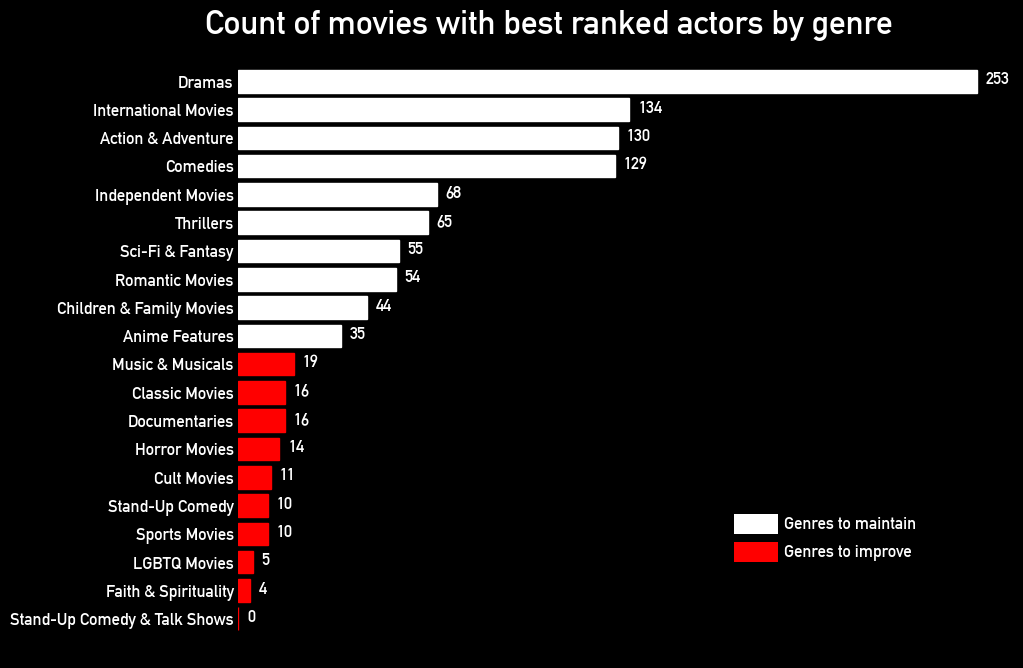

In [24]:
fig, ax = plt.subplots(figsize=(10,8))

bar_plot1 = ax.barh(np.arange(0,top_by_genre.shape[0]), top_by_genre["top_actors"], label="top_actors", color='#3ba1c5')

for i,rect in enumerate(bar_plot1.patches):
    if (i<=9): 
        rect.set_color('red') #set the rect at position 1 blue
    else:
        rect.set_color('white') #set other rects grey
        
ax.tick_params(axis="both", which="both",length=0, labelbottom=False)

ax.set_yticks(np.arange(0,top_by_genre.shape[0]))
ax.set_yticklabels(top_by_genre["genre"], fontweight='book', c="white", fontsize=12, fontname = 'DIN ALTERNATE')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.patch.set_facecolor('black')
#plt.figure(facecolor='black')
ax.set_facecolor("black")
ax.set_title("Count of movies with best ranked actors by genre", fontweight="bold", c="white", fontsize=24, fontname = 'DIN ALTERNATE', x=0.4)

for i in range(len(top_by_genre["top_actors"])):
    ax.text(top_by_genre["top_actors"][i]+3,np.arange(0,top_by_genre.shape[0])[i]-0.1,top_by_genre["top_actors"][i], fontsize=12, c="white", fontname = 'DIN ALTERNATE')

ax.add_patch(Rectangle((170,2), 15, 0.7, facecolor = 'red',))
ax.add_patch(Rectangle((170,3), 15, 0.7, facecolor = 'white'))
ax.text(187,3.2,"Genres to maintain ", fontsize=12, c="white", fontname = 'DIN ALTERNATE')
ax.text(187,2.2,"Genres to improve", fontsize=12, c="white", fontname = 'DIN ALTERNATE')

plt.savefig('actors.png', dpi=600, bbox_inches='tight' )

In [11]:
movies=netflix_new3[netflix_new3["numVotes"]>500][netflix_new3["type"]=="Movie"].sort_values("averageRating", ascending=False).iloc[0:10][["title","averageRating"]].sort_values("averageRating").reset_index(drop=True)
tv=netflix_new3[netflix_new3["numVotes"]>500][netflix_new3["type"]=="TV Show"].sort_values("averageRating", ascending=False).iloc[0:10][["title","averageRating"]].sort_values("averageRating").reset_index(drop=True)
act=actors[actors["rated_movies"]>5].sort_values("averageRating", ascending=False).iloc[0:10][["name","averageRating"]].sort_values("averageRating").reset_index(drop=True)
dire=directors[directors["rated_movies"]>5].sort_values("averageRating", ascending=False).iloc[0:10][["name","averageRating"]].sort_values("averageRating").reset_index(drop=True)

/var/folders/g9/q6tzypkx56110bt4s_wsr1y40000gn/T/ipykernel_20431/3881909023.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies=netflix_new3[netflix_new3["numVotes"]>500][netflix_new3["type"]=="Movie"].sort_values("averageRating", ascending=False).iloc[0:10][["title","averageRating"]].sort_values("averageRating").reset_index(drop=True)
/var/folders/g9/q6tzypkx56110bt4s_wsr1y40000gn/T/ipykernel_20431/3881909023.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tv=netflix_new3[netflix_new3["numVotes"]>500][netflix_new3["type"]=="TV Show"].sort_values("averageRating", ascending=False).iloc[0:10][["title","averageRating"]].sort_values("averageRating").reset_index(drop=True)


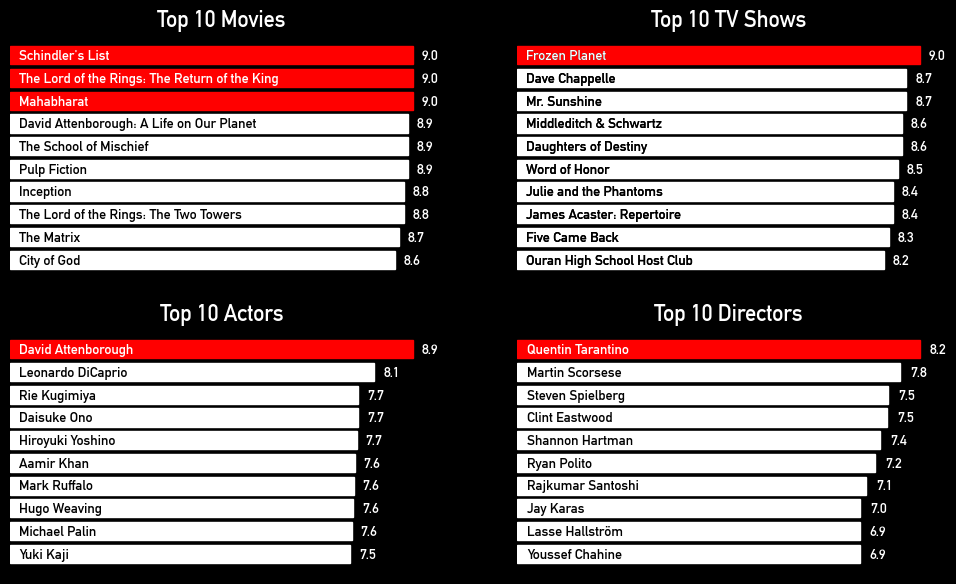

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,7))
#fig.suptitle('Best ranked movies, actors and directors')
bar_plot1 = ax1.barh(np.arange(0,10), movies["averageRating"], label="Top Movies", color='white')
bar_plot2 = ax2.barh(np.arange(0,10), tv["averageRating"], label="Top TV Shows", color='white')
bar_plot3 = ax3.barh(np.arange(0,10), act["averageRating"], label="Top Actors", color='white')
bar_plot4 = ax4.barh(np.arange(0,10), dire["averageRating"], label="Top Actors", color='white')

for i,rect in enumerate(bar_plot1.patches):
    if (i>=7): 
        rect.set_color('red')
    else:
        rect.set_color('white')      

for i,rect in enumerate(bar_plot2.patches):
    if (i==9): 
        rect.set_color('red')
    else:
        rect.set_color('white')
        
for i,rect in enumerate(bar_plot3.patches):
    if (i==9): 
        rect.set_color('red')
    else:
        rect.set_color('white')
        
for i,rect in enumerate(bar_plot4.patches):
    if (i==9): 
        rect.set_color('red')
    else:
        rect.set_color('white')

ax1.set_title("Top 10 Movies", fontdict={'color':"white"}, fontname = 'DIN ALTERNATE', fontsize=16)
ax2.set_title("Top 10 TV Shows", fontdict={'color':"white"}, fontname = 'DIN ALTERNATE', fontsize=16)
ax3.set_title("Top 10 Actors", fontdict={'color':"white"}, fontname = 'DIN ALTERNATE', fontsize=16)
ax4.set_title("Top 10 Directors", fontdict={'color':"white"}, fontname = 'DIN ALTERNATE', fontsize=16)

ax1.set_yticklabels("")
ax2.set_yticklabels("")
ax3.set_yticklabels("")
ax4.set_yticklabels("")

fig.patch.set_facecolor('black')
ax1.set_facecolor("black")
ax2.set_facecolor("black")
ax3.set_facecolor("black")
ax4.set_facecolor("black")

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.tick_params(axis="both", which="both",length=0, labelbottom=False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.tick_params(axis="both", which="both",length=0, labelbottom=False)

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.tick_params(axis="both", which="both",length=0, labelbottom=False)

ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.tick_params(axis="both", which="both",length=0, labelbottom=False)

for i in range(10):
    ax1.text(movies["averageRating"][i]+0.2,np.arange(0,movies.shape[0])[i]-0.2, movies["averageRating"][i], fontsize=10, c="white", fontname = 'DIN ALTERNATE')
    ax2.text(0.2,np.arange(0,tv.shape[0])[i]-0.2,tv["title"][i], fontsize=10, c="black", fontname = 'DIN ALTERNATE')
    ax2.text(tv["averageRating"][i]+0.2,np.arange(0,tv.shape[0])[i]-0.2, tv["averageRating"][i], fontsize=10, c="white", fontname = 'DIN ALTERNATE')
    ax3.text(act["averageRating"][i]+0.2,np.arange(0,act.shape[0])[i]-0.2, round(act["averageRating"][i],1), fontsize=10, c="white", fontname = 'DIN ALTERNATE')
    ax4.text(dire["averageRating"][i]+0.2,np.arange(0,dire.shape[0])[i]-0.2, round(dire["averageRating"][i],1), fontsize=10, c="white", fontname = 'DIN ALTERNATE')
    if i==9:
        ax1.text(0.2,np.arange(0,movies.shape[0])[i]-0.2,movies["title"][i], fontsize=10, c="white", fontname = 'DIN ALTERNATE')
        ax2.text(0.2,np.arange(0,tv.shape[0])[i]-0.2,tv["title"][i], fontsize=10, c="white", fontname = 'DIN ALTERNATE')
        ax3.text(0.2,np.arange(0,movies.shape[0])[i]-0.2,act["name"][i], fontsize=10, c="white", fontname = 'DIN ALTERNATE')
        ax4.text(0.2,np.arange(0,dire.shape[0])[i]-0.2,dire["name"][i], fontsize=10, c="white", fontname = 'DIN ALTERNATE')
    elif i>=7:
        ax1.text(0.2,np.arange(0,movies.shape[0])[i]-0.2,movies["title"][i], fontsize=10, c="white", fontname = 'DIN ALTERNATE')
        ax2.text(0.2,np.arange(0,tv.shape[0])[i]-0.2,tv["title"][i], fontsize=10, c="black", fontname = 'DIN ALTERNATE')
        ax3.text(0.2,np.arange(0,movies.shape[0])[i]-0.2,act["name"][i], fontsize=10, c="black", fontname = 'DIN ALTERNATE')
        ax4.text(0.2,np.arange(0,dire.shape[0])[i]-0.2,dire["name"][i], fontsize=10, c="black", fontname = 'DIN ALTERNATE')

    else:
        ax1.text(0.2,np.arange(0,movies.shape[0])[i]-0.2,movies["title"][i], fontsize=10, c="black", fontname = 'DIN ALTERNATE')
        ax2.text(0.2,np.arange(0,tv.shape[0])[i]-0.2,tv["title"][i], fontsize=10, c="black", fontname = 'DIN ALTERNATE')
        ax3.text(0.2,np.arange(0,movies.shape[0])[i]-0.2,act["name"][i], fontsize=10, c="black", fontname = 'DIN ALTERNATE')
        ax4.text(0.2,np.arange(0,dire.shape[0])[i]-0.2,dire["name"][i], fontsize=10, c="black", fontname = 'DIN ALTERNATE')

for i,rect in enumerate(bar_plot1.patches):
    if (i>=7): 
        rect.set_color('red')
    else:
        rect.set_color('white')
        
plt.savefig('top.png', dpi=600)

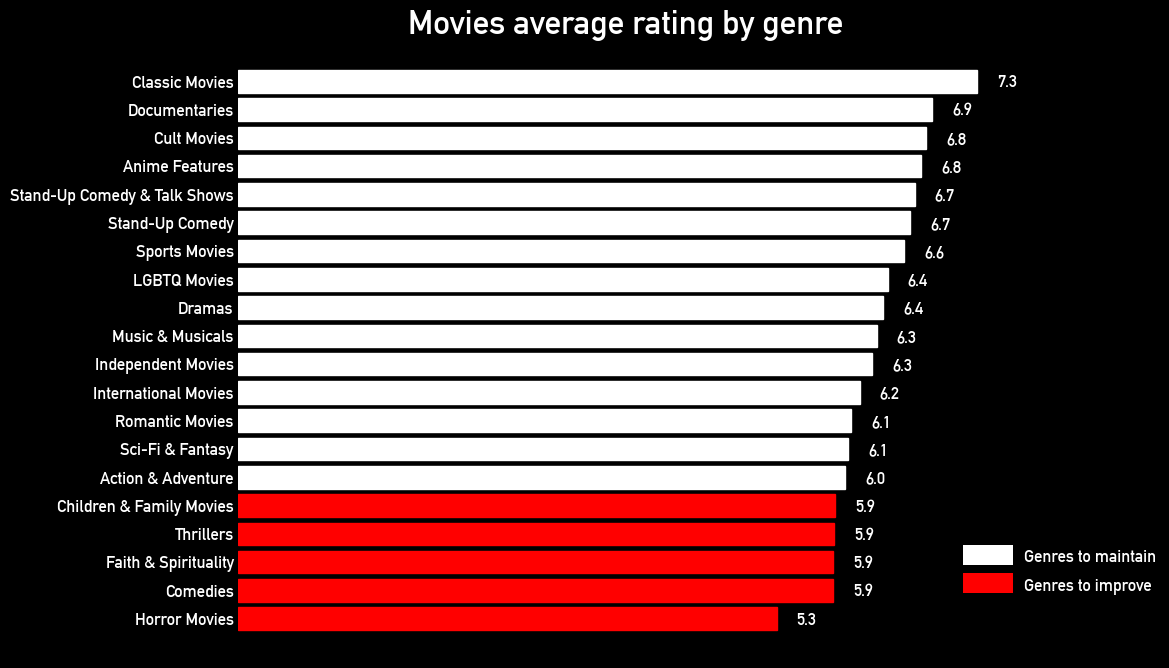

In [25]:
fig, ax = plt.subplots(figsize=(10,8))

bar_plot1 = ax.barh(np.arange(0,gen.shape[0]), gen["averageRating"], label="averageRating", color='#3ba1c5')

for i,rect in enumerate(bar_plot1.patches):
    if (i<=4): 
        rect.set_color('red') #set the rect at position 1 blue
    else:
        rect.set_color('white') #set other rects grey
        
ax.tick_params(axis="both", which="both",length=0, labelbottom=False)

ax.set_yticks(np.arange(0,gen.shape[0]))
ax.set_yticklabels(gen["genre"], fontweight='book', c="white", fontsize=12, fontname = 'DIN ALTERNATE')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.patch.set_facecolor('black')
#plt.figure(facecolor='black')
ax.set_facecolor("black")
ax.set_title("Movies average rating by genre", fontweight="bold", c="white", fontsize=24, fontname = 'DIN ALTERNATE')

for i in range(len(top_by_genre["top_actors"])):
    ax.text(gen["averageRating"][i]+0.2,np.arange(0,gen.shape[0])[i]-0.2,round(gen["averageRating"][i],1), fontsize=12, c="white", fontname = 'DIN ALTERNATE')

ax.text(7.8,2,"Genres to maintain ", fontsize=12, c="white", fontname = 'DIN ALTERNATE')
ax.text(7.8,1,"Genres to improve", fontsize=12, c="white", fontname = 'DIN ALTERNATE')
ax.add_patch(Rectangle((7.2,0.9), 2, 0.7, facecolor = 'red'))
ax.add_patch(Rectangle((7.2,1.9), 2, 0.7, facecolor = 'white'))

plt.savefig('quality.png', dpi=600, bbox_inches='tight')